# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to
investigate the following :
* The mean sales generated by each zone.
* Total sales generated by all the zones for each month.
* Check whether all the zones generate the same amount of sales.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# importing data set in to python envirinment 
data= pd.read_csv("Sales_data_zone_wise.csv")

In [4]:
#first five rows of dataset
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [5]:
#Last five rows of dataset
data.tail()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [6]:
#shape of the dataset
data.shape

(29, 5)

In [7]:
#columns present in the dataset
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [8]:
#A concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [9]:
# Checking null values
data.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

no null value present im the dataset

In [10]:
# Getting descriptive statistics summary
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


## 1.The mean sale generated by each zone. 

In [11]:
#Finding mean for each Zones
data.mean().round(2)


Zone - A    1540493.14
Zone - B    1755559.59
Zone - C    1772871.03
Zone - D    1842926.76
dtype: float64

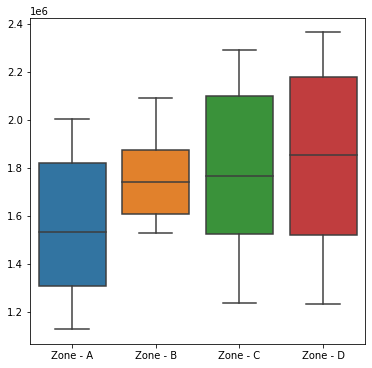

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data)
plt.show()

INSIGHTS:
* Highest mean sale for Zone D
* Lowest mean sale for Zone A

# 2.Total sales generated by all the zones for each month.

In [13]:
#ading new column "Total sales" to the dataset
data['Total sales']=data.sum(axis=1)
#final dataset
data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


In [14]:
data['Total sales'].describe().round()

count         29.0
mean     6911851.0
std       590892.0
min      5925424.0
25%      6506659.0
50%      7032783.0
75%      7155515.0
max      8174449.0
Name: Total sales, dtype: float64

* Mean of the Total sale is 6911850
* Maximum total sale is 8174449 (month 4)
* Minimum Total sale is 5925424(month 5)


Text(0.5, 0, 'Zones')

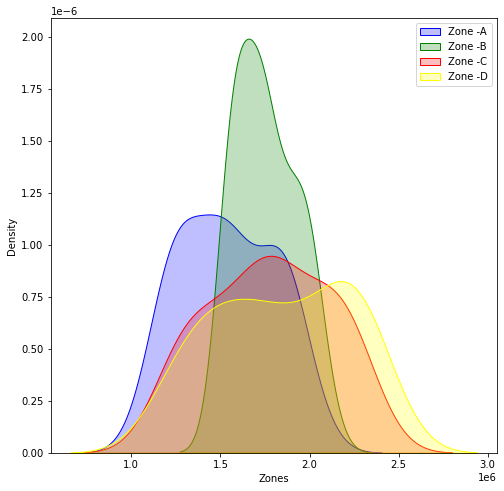

In [15]:
# plotting the KDE Plot
plt.figure(figsize=(8,8))
sns.kdeplot(data['Zone - A'],color="blue",shade=True,Label="Zone -A")
sns.kdeplot(data['Zone - B'],color="green",shade=True,Label="Zone -B")
sns.kdeplot(data['Zone - C'],color="red",shade=True,Label="Zone -C")
sns.kdeplot(data['Zone - D'],color="yellow",shade=True,Label="Zone -D")
plt.legend()
#setting the X label
plt.xlabel('Zones')

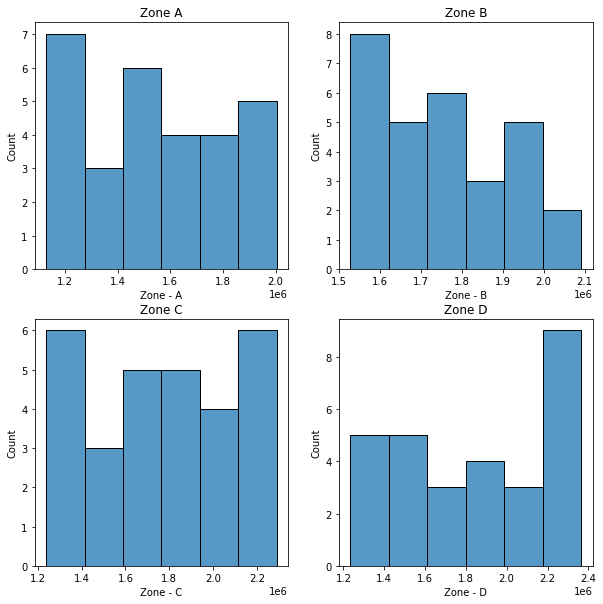

In [16]:

fig, axes = plt.subplots( figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(x='Zone - A',data=data)
plt.title('Zone A')

plt.subplot(2,2,2)
sns.histplot(x='Zone - B',data=data)
plt.title('Zone B')

plt.subplot(2,2,3)
sns.histplot(x='Zone - C',data=data)
plt.title('Zone C')

plt.subplot(2,2,4)
sns.histplot(x='Zone - D',data=data)
plt.title('Zone D')
plt.show()

<AxesSubplot:xlabel='Zone - D', ylabel='Density'>

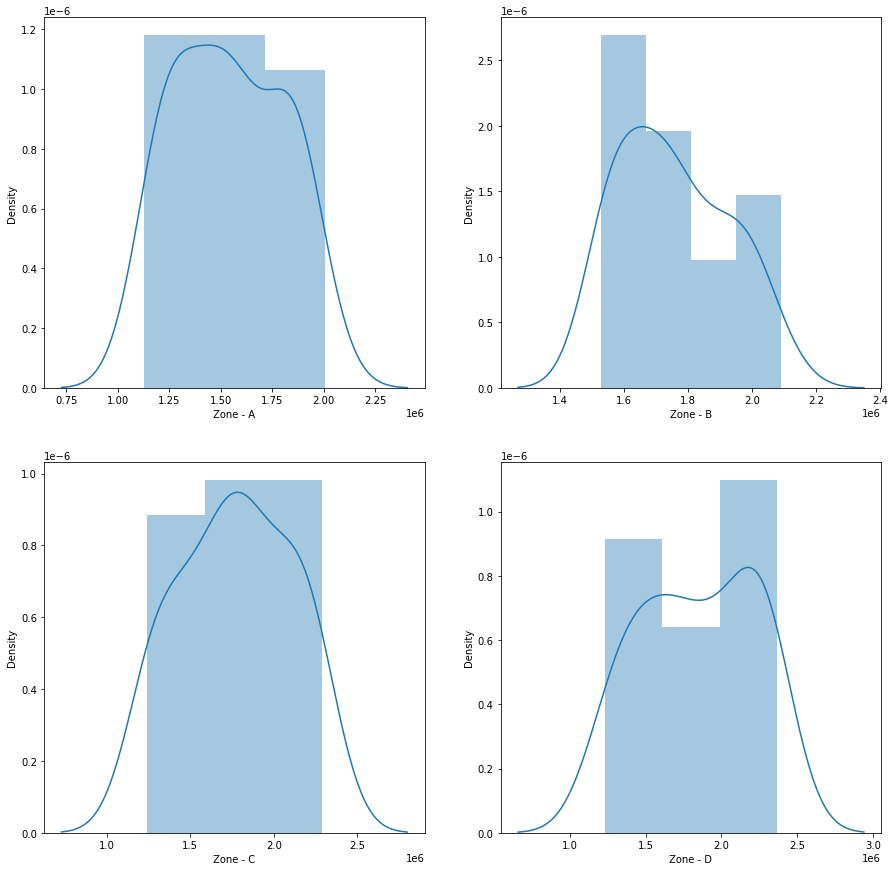

In [17]:
#distplot
fig, axes = plt.subplots( figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(data["Zone - A"])

plt.subplot(2,2,2)
sns.distplot(data["Zone - B"])

plt.subplot(2,2,3)
sns.distplot(data["Zone - C"])

plt.subplot(2,2,4)
sns.distplot(data["Zone - D"])


* Zone C is normaly distributed as compared to other zones.


# 3.Check whether all the zones generate the same amount of sales.

Testing Using ANOVA


* Null hypothesis(H0)-All the zones generate the same amount of sales.


* Alternative hypothesis(H1)-All the zones generate the different amount of sales.

significance level as alpha =0.05

* if p value <0.05,we reject null hypothesis and accept Alternative hypothesis.
* if p value >0.05, we can accept null hypothesis and reject Alternative hypothesis.

In [18]:
#anova F & P value using f_oneway
import scipy.stats as stats
fvalue,pvalue=stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])
print("f value:",fvalue)
print("p value:",pvalue)
if pvalue<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")


f value: 5.672056106843581
p value: 0.0011827601694503335
Reject null hypothesis


INSIGHT:
* From ANOVA test, p value is 0.0011 which is less than 0.05
* Reject the null hypothesis,All the zones generate the different amount of sales.



Submitted by VARSHA M